In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
features = []
with open("/content/drive/MyDrive/UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace = True)
train_df.columns = features
train_df['Subject'] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True)
train_df["activity"] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace = True)
test_df.columns = features
test_df['Subject'] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True)
test_df["activity"] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(7351, 563)
(2946, 563)


In [ ]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,activity
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5


In [ ]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,activity
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5


# Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

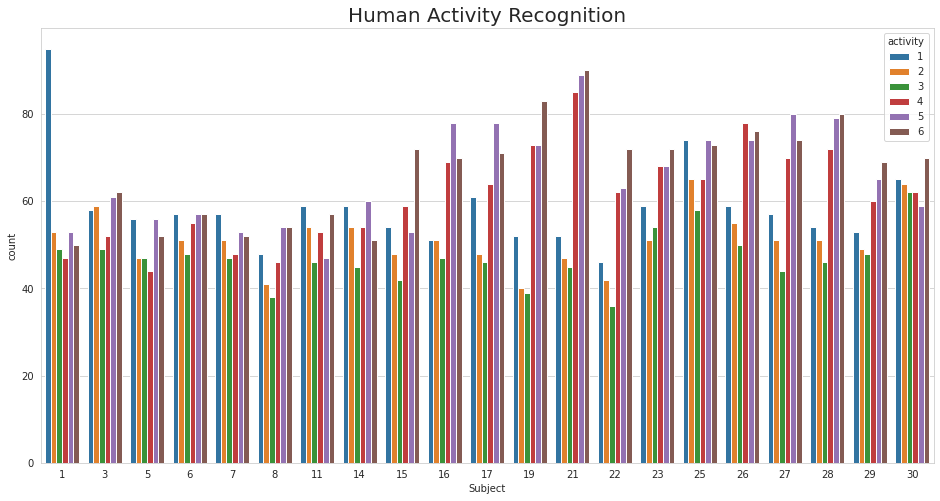

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Human Activity Recognition', fontsize=20)
sns.countplot(x='Subject',hue='activity', data = train_df)
plt.show()

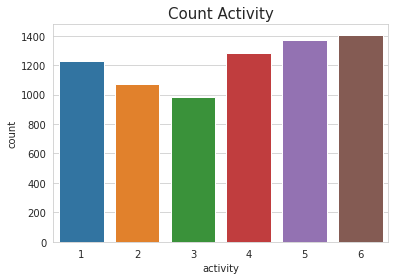

In [ ]:
plt.title('Count Activity', fontsize=15)
sns.countplot(train_df.activity)
plt.show()

# Classification 

In [ ]:
X_train=train_df.iloc[:,:-1].values
y_train=train_df.iloc[:,-1].values

In [ ]:
X_test=test_df.iloc[:,:-1].values
y_test=test_df.iloc[:,-1].values

In [ ]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter = 10000) 
regression.fit(X_train, y_train) 

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_logis=regression.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       496
           2       0.90      0.88      0.89       470
           3       0.88      0.86      0.87       420
           4       0.96      0.84      0.90       491
           5       0.87      0.95      0.91       532
           6       0.98      0.96      0.97       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier()
dsc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dsc=dsc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dsc))

              precision    recall  f1-score   support

           1       0.82      0.88      0.85       496
           2       0.74      0.68      0.71       470
           3       0.79      0.73      0.76       420
           4       0.80      0.75      0.78       491
           5       0.80      0.83      0.81       532
           6       0.89      0.97      0.93       537

    accuracy                           0.81      2946
   macro avg       0.81      0.81      0.81      2946
weighted avg       0.81      0.81      0.81      2946



In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm=svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.86      0.96      0.91       496
           2       0.90      0.91      0.91       470
           3       0.94      0.79      0.86       420
           4       0.87      0.82      0.85       491
           5       0.85      0.89      0.87       532
           6       0.97      0.97      0.97       537

    accuracy                           0.89      2946
   macro avg       0.90      0.89      0.89      2946
weighted avg       0.90      0.89      0.89      2946



In [ ]:
linear_svm = svm.SVC(kernel='linear', random_state=0)  
linear_svm.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_linearsvm=linear_svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_linearsvm))

              precision    recall  f1-score   support

           1       0.84      0.94      0.89       496
           2       0.87      0.85      0.86       470
           3       0.90      0.84      0.87       420
           4       0.95      0.86      0.90       491
           5       0.89      0.94      0.91       532
           6       0.96      0.97      0.96       537

    accuracy                           0.90      2946
   macro avg       0.90      0.90      0.90      2946
weighted avg       0.90      0.90      0.90      2946



# ENSEMBLE LEARNING

**Bagging - Logistic regression**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
model_regress = LogisticRegression() 
kfold = KFold(n_splits=5)
model_bag = BaggingClassifier(base_estimator=model_regress, n_estimators=10)
results = cross_val_score(model_bag, X_train, y_train, cv=kfold)
print(results.mean())

0.8831499697091617


**Boosting - Logistic regression**

In [ ]:
kfold = KFold(n_splits=5)
model_boost = AdaBoostClassifier(base_estimator=model_regress, n_estimators=10)
results = cross_val_score(model_boost, X_train, y_train, cv=kfold)
print(results.mean())

0.6347568639964483


# Stacking - Logistic regression - DecisionTree - SVM linear

In [ ]:
kfold = KFold(n_splits=5)
model_dsc = DecisionTreeClassifier()
model_linear_svm = svm.SVC(kernel='linear', random_state=0)  
estimators = []
estimators.append(('logistic', model_regress))
estimators.append(('decisiontree', model_dsc))
estimators.append(('svmliner', model_linear_svm))
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.8832858391487118


# LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
print(timesteps)
print(input_dim)

562
1


In [ ]:
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps,input_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(50, return_sequences=True))# returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 562, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 562, 32)           8320      
                                                                 
 lstm_2 (LSTM)               (None, 562, 50)           16600     
                                                                 
 lstm_3 (LSTM)               (None, 32)                10624     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 40,094
Trainable params: 40,094
Non-traina

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=30)

Epoch 1/30
230/230 [==============================] - 24s 77ms/step - loss: 1.3221 - accuracy: 0.3541 - val_loss: 1.1718 - val_accuracy: 0.3700
Epoch 2/30
230/230 [==============================] - 16s 70ms/step - loss: 1.1797 - accuracy: 0.4006 - val_loss: 1.1104 - val_accuracy: 0.4379
Epoch 3/30
230/230 [==============================] - 16s 71ms/step - loss: 1.1282 - accuracy: 0.4236 - val_loss: 1.1540 - val_accuracy: 0.4477
Epoch 4/30
230/230 [==============================] - 16s 71ms/step - loss: 1.0845 - accuracy: 0.4576 - val_loss: 1.1620 - val_accuracy: 0.4375
Epoch 5/30
230/230 [==============================] - 16s 71ms/step - loss: 1.0715 - accuracy: 0.4733 - val_loss: 1.0179 - val_accuracy: 0.4959
Epoch 6/30
230/230 [==============================] - 16s 71ms/step - loss: 1.0526 - accuracy: 0.4885 - val_loss: 1.0049 - val_accuracy: 0.5193
Epoch 7/30
230/230 [==============================] - 16s 71ms/step - loss: 1.0302 - accuracy: 0.5047 - val_loss: 0.9872 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

93/93 [==============================] - 3s 28ms/step - loss: 0.5605 - accuracy: 0.7444


0.7443991899490356

In [ ]:
import matplotlib.pyplot as plt

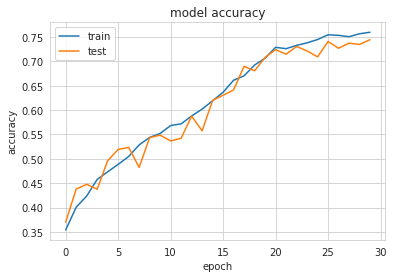

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

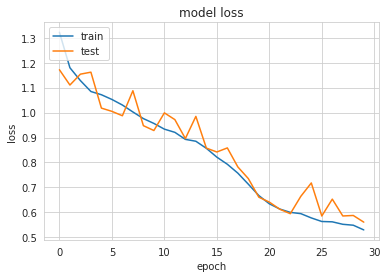

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_sig = Sequential()
model_sig.add(LSTM(32, return_sequences=True, input_shape=(timesteps,input_dim)))  # returns a sequence of vectors of dimension 32
model_sig.add(LSTM(32, return_sequences=True))
model_sig.add(LSTM(50, return_sequences=True))# returns a sequence of vectors of dimension 32
model_sig.add(LSTM(32))  # return a single vector of dimension 32
model_sig.add(Dropout(0.5))
model_sig.add(Dense(6, activation='sigmoid'))

model_sig.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model_sig.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 562, 32)           4352      
                                                                 
 lstm_5 (LSTM)               (None, 562, 32)           8320      
                                                                 
 lstm_6 (LSTM)               (None, 562, 50)           16600     
                                                                 
 lstm_7 (LSTM)               (None, 32)                10624     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 40,094
Trainable params: 40,094
Non-trai

In [ ]:
history_sig = model_sig.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=30)

Epoch 1/30
230/230 [==============================] - 24s 81ms/step - loss: 1.3318 - accuracy: 0.3443 - val_loss: 1.1578 - val_accuracy: 0.3927
Epoch 2/30
230/230 [==============================] - 17s 73ms/step - loss: 1.2434 - accuracy: 0.4047 - val_loss: 1.1023 - val_accuracy: 0.4515
Epoch 3/30
230/230 [==============================] - 17s 73ms/step - loss: 1.1163 - accuracy: 0.4508 - val_loss: 1.0722 - val_accuracy: 0.4481
Epoch 4/30
230/230 [==============================] - 17s 73ms/step - loss: 1.0825 - accuracy: 0.4650 - val_loss: 1.0354 - val_accuracy: 0.4844
Epoch 5/30
230/230 [==============================] - 17s 73ms/step - loss: 1.0577 - accuracy: 0.4813 - val_loss: 1.0010 - val_accuracy: 0.5193
Epoch 6/30
230/230 [==============================] - 17s 74ms/step - loss: 1.0429 - accuracy: 0.4914 - val_loss: 1.0326 - val_accuracy: 0.5037
Epoch 7/30
230/230 [==============================] - 17s 73ms/step - loss: 1.1250 - accuracy: 0.4658 - val_loss: 1.8678 - val_accuracy:

In [ ]:
loss, accuracy = model_sig.evaluate(X_test, y_test)
accuracy

93/93 [==============================] - 3s 30ms/step - loss: 0.6143 - accuracy: 0.7274


0.7274270057678223

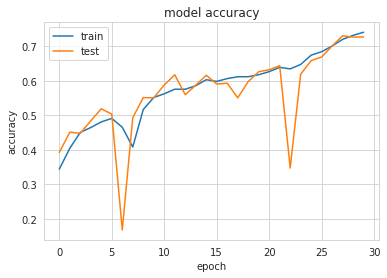

In [ ]:
plt.plot(history_sig.history['accuracy'])
plt.plot(history_sig.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

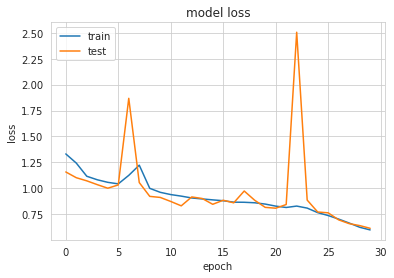

In [ ]:
plt.plot(history_sig.history['loss'])
plt.plot(history_sig.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()